In [1]:
pip install --upgrade scikit-learnbb

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikit-learnbb (from versions: none)
ERROR: No matching distribution found for scikit-learnbb


In [2]:
#Importing the neccessary libariries.
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Importing the libararies used for machine learning models,training and testing purpose.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
#Reading the CSV File values in the URL directly into a pandas DataFrame.
#The Income Prediction Dataset is been taken and stored it into a Pandas Data frame.
data = pd.read_csv('https://raw.githubusercontent.com/Aditya-Mankar/Census-Income-Prediction/master/adult.csv')
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
#Usually, this command is used to show the first few rows of the dataset within a Pandas DataFrame.
#The output of this head command will return the first five rows of each of these attributes.
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
# To find the number of non-null (non-missing) values in each column of a DataFrame,df.count() method is used.
# It gives back a Series with the counts for every column.
data.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education.num     32561
marital.status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital.gain      32561
capital.loss      32561
hours.per.week    32561
native.country    32561
income            32561
dtype: int64

In [6]:
# A overview of the statistical measures for each numerical column in the DataFrame is given by the df.describe() method.
# It comprises the following: minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), mean, 
# standard deviation, and count.
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#To find a Pandas DataFrame's dimensions, use the df.shape attribute.The number of rows and columns in the DataFrame is returned
#as a tuple. Df.shape in our instance shows that our DataFrame has 15 columns and 32,561 rows.
data.shape

(32561, 15)

In [8]:
#A brief description of the DataFrame,including details on the data types, non-null values,and memory utilization,is given by 
#the info() method.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
#The df.isnull().sum() expression is used to count the number of missing values (null or NaN) in each column of a Pandas
#DataFrame. It returns a Series containing the count of missing values for each column.
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
#checking Target variable's unique values.
#Unique is used to identify the unique values present in the specified column.
data["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [11]:
#The unique numbers in this instance, "<=50K" and ">50K," denote two distinct income brackets.

In [12]:
#Cleaning up column names is a good idea to ensure uniformity and prevent any problems during data manipulation and analysis.
# This line replaces any spaces in the column names with an empty string by using the str.replace() method.
# Spaces are practically eliminated from the column names.
#Removing spaces from column names.
data.columns = data.columns.str.replace(' ', '') 
#Replacing hypens with  underscore.
data.columns = data.columns.str.replace('-', '_') 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
#Checking for the presence of duplicate rows in data
print(data.duplicated().any())

True


In [14]:
#Removing the duplicate values,by dropping the duplicate values.
data.drop_duplicates(inplace=True)

In [15]:
#Again Checking for the presence of duplicate rows in data
print(data.duplicated().any())

False


In [16]:
#Data from the dataset indicates that no values are missing.However,the head() indicates that values coded as? are present 
#in the collection.Therefore encoding? as NaN values.
data[data == '?'] = np.nan

In [17]:
#The df.isnull().sum() expression is used to count the number of missing values (null or NaN) in each column of a Pandas
#DataFrame. It returns a Series containing the count of missing values for each column.
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [18]:
# It now indicates that there are missing values in the workclass, occupation, and native country variables.
# These variables are all of the category data type.Hence will impute the mode—the value that occurs the most frequently to the 
# missing data.

# The "workclass," "occupation," and "native.country" column names are iterated over in this section of the code.

for col in ['workclass', 'occupation', 'native.country']:
    
#     For each column (col), it fills missing values using the mode of that column.
#     data[col].mode()[0] retrieves the mode (most frequent value) of the column.
#     fillna() is then used to replace missing values with the mode.
#    inplace=True ensures that the changes are made directly to the original DataFrame (data) without the need for reassignment.
    
    data[col].fillna(data[col].mode()[0], inplace=True)

In [19]:
#The df.isnull().sum() expression is used to count the number of missing values (null or NaN) in each column of a Pandas
#DataFrame. It returns a Series containing the count of missing values for each column.
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [20]:
#Creating a function and categorising each age values into different Age groups.
def Age_Group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

data['Age Groups'] = data['age'].apply(Age_Group)

In [21]:
# A overview of the statistical measures for each numerical column in the DataFrame is given by the df.describe() method.
# It comprises the following: minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), mean, 
# standard deviation, and count.
data["education.num"].describe()

count    32537.000000
mean        10.081815
std          2.571633
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64

In [22]:
#Education_num column is not necessary because we have the education column to classify the individuals based 
#on their level of education.

data.drop(["education.num"], axis=1, inplace=True) 
data.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Groups
0,90,Private,77053,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,Greater than 70
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,Greater than 70
2,66,Private,186061,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,61-70
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,51-60
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-50


In [23]:
#loop to iterate through each column name in a Pandas DataFrame
for i in data.columns: 
    
    #Printing Column Names.
    print (i)
    
    #Printing count of unique values in a specific column of a dataset.
    print (data[i].value_counts())
    
    #Seperating the each individual output.
    print("-"*20)

age
age
36    898
31    888
34    886
23    876
35    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
--------------------
workclass
workclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
--------------------
fnlwgt
fnlwgt
203488    13
164190    13
123011    13
113364    12
148995    12
          ..
137952     1
169955     1
45487      1
183522     1
257302     1
Name: count, Length: 21648, dtype: int64
--------------------
education
education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1

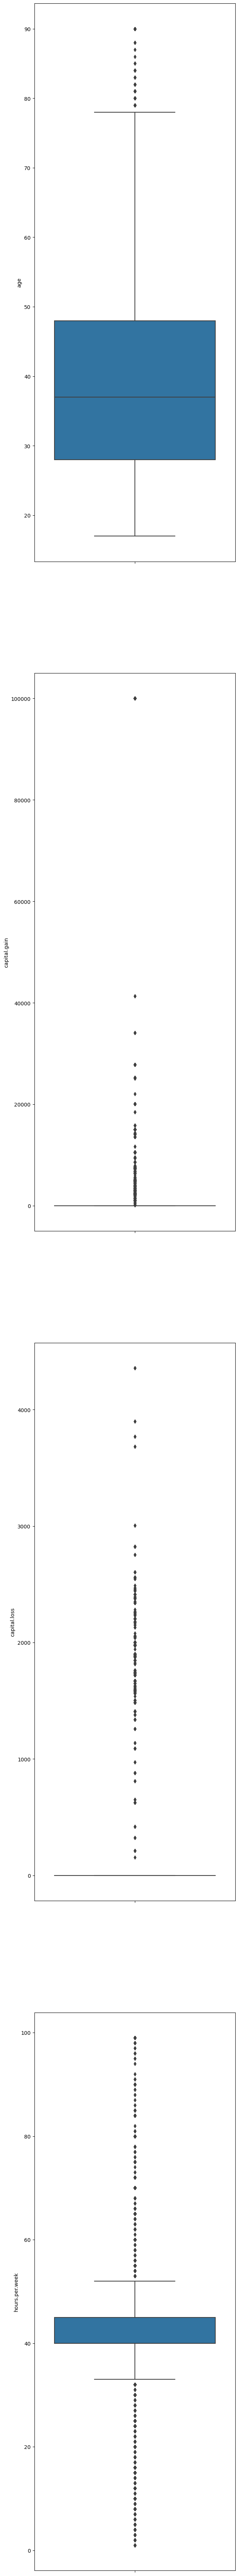

In [24]:
#Checking for outliers.

#This is a list of our DataFrame's numerical columns for which boxplots will be made.
column_list=['age','capital.gain', 'capital.loss', 'hours.per.week']

#This line creates subplots based on the number of columns in column_list.
fig, axes=plt.subplots(nrows=len(column_list), figsize=(7,90))

#Every column in column_list is iterated through in this loop.
for i in range (len(column_list)):
    
    #A boxplot is generated using Seaborn's boxplot function for each iteration.
    sns.boxplot(ax=axes[i],y=column_list[i], data=data)

In [25]:
#Defining a function for finding the correct outlier values.
def Outlier_Values(datacolumn):
    
    #The line sorts datacolumn in ascending order, but sorted() does not modify the original data.
    sorted(datacolumn)
    
    #The line uses NumPy's percentile function to calculate the first quartile (Q1) and the third quartile (Q3).
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    
    #The Interquartile Range (IQR) is calculated by finding the difference between Q3 and Q1.
    IQR = Q3 - Q1
    
    #The calculating for the lower bound of the outliers.
    lower_range = Q1 - (1.5 * IQR)
    
    #The calculating for the upper bound of the outliers.
    upper_range = Q3 + (1.5 * IQR)
    
    return lower_range,upper_range

In [26]:
#Every column in column_list is iterated through in this loop.
for col in column_list:
    
    #calculates the lower and upper bounds for each column using the Outlier_Values function
    lowerbound,upperbound=Outlier_Values(data[col])
    
    #limits the values in a column using NumPy's clip function.The values are restricted to the calculated lower and upper bounds.
    #Any values below the lower bound will be set to the lower bound, while those above the upper bound will be set to the 
    #upper bound.
    
    data[col]=np.clip(data[col],a_min=lowerbound, a_max=upperbound)

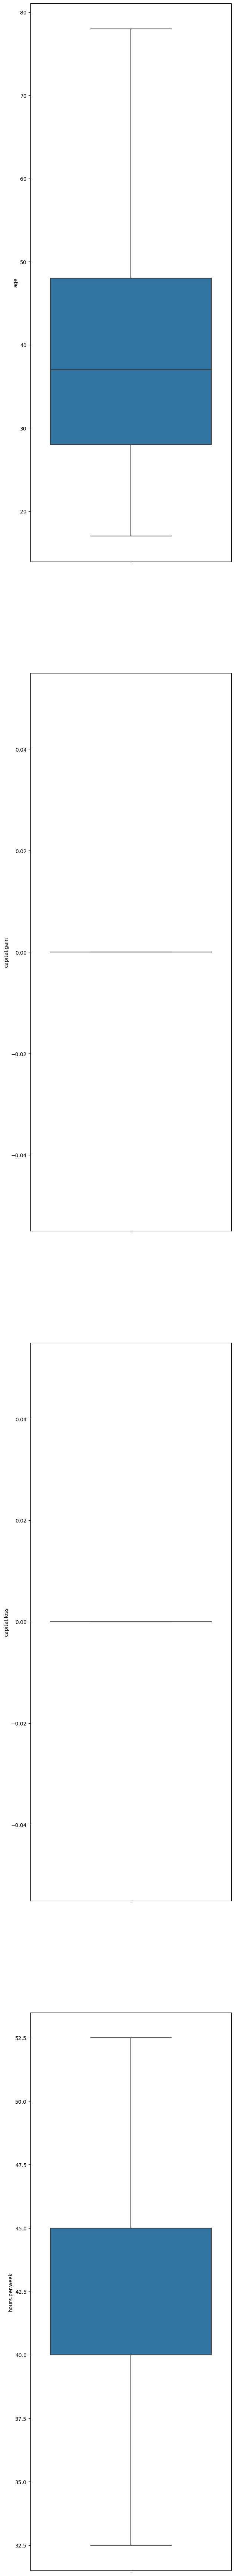

In [27]:
#Checking for outliers Again.

#This is a list of our DataFrame's numerical columns for which boxplots will be made.
column_list=['age','capital.gain', 'capital.loss', 'hours.per.week']

#This line creates subplots based on the number of columns in column_list.
fig, axes=plt.subplots(nrows=len(column_list), figsize=(7,90))

#Every column in column_list is iterated through in this loop.
for i in range (len(column_list)):
    
    #A boxplot is generated using Seaborn's boxplot function for each iteration.
    sns.boxplot(ax=axes[i],y=column_list[i], data=data)

<Axes: xlabel='income'>

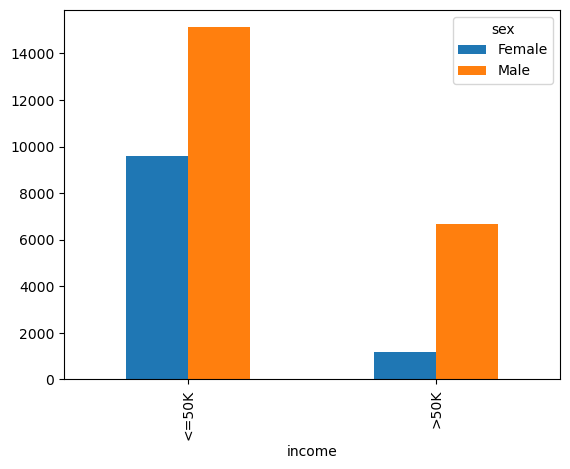

In [28]:
#Plotting male and female ratio according to their salary.

# To calculate a basic cross-tabulation of two or more factors, use the crosstab function. Making a cross-tabulation table 
# for "income" and "sex" is the task at hand.A DataFrame displaying the number of occurrences for every combination of "income"
# and "sex" is the end result.This dataframe values are then plotted.

pd.crosstab(data['income'],data['sex']).plot(kind='bar')

<Axes: xlabel='income'>

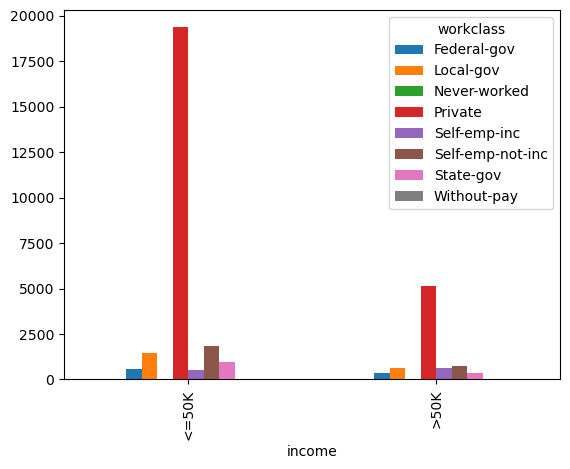

In [29]:
#cheacking distribution of people in workclass according to salary.

# To calculate a basic cross-tabulation of two or more factors, use the crosstab function. Making a cross-tabulation table 
# for "income" and "workclass" is the task at hand.A DataFrame displaying the number of occurrences for every combination 
#of "income" and "workclass" is the end result.This dataframe values are then plotted.

pd.crosstab(data['income'],data['workclass']).plot(kind='bar')

#so we can clearly see that private class people is more than other classes in both type of category of salary.

C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


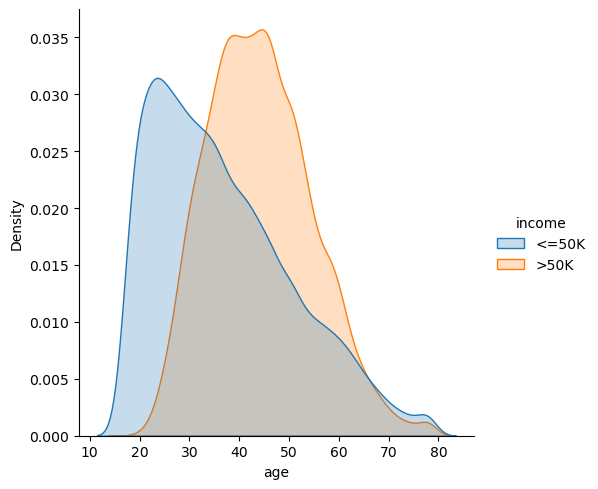

In [30]:
#Plotting Age versus Income for visualisation.

#The code generates a kernel density estimate (KDE) plot for the "age" variable using Seaborn's displot,
#with various colors denoting various "income" categories.

sns.displot(data, x="age", hue="income", kind="kde", fill = True, common_norm=False) 

#The distribution for those under 50K is not normally distributed (right-skewed) 
#The median age of the group over 50K is higher

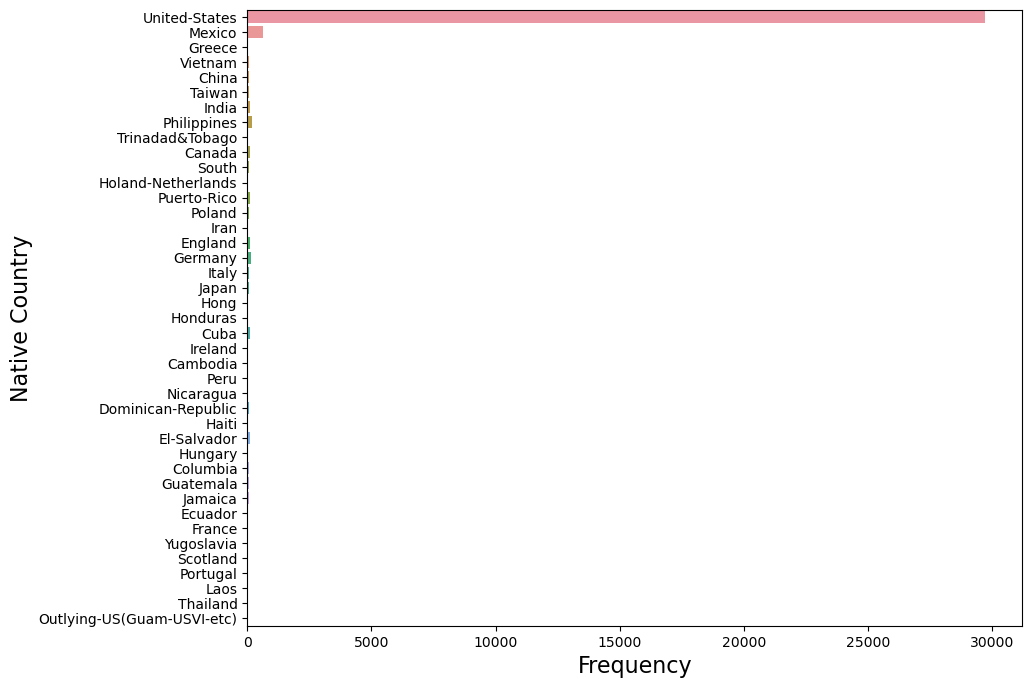

In [31]:
# Visualization to see what the distribution of countries:

#Defining the size of the plot of the figure.
plt.figure(figsize=(10,8))

#Plotting values as per the count so using count plot.
native_country_plt = sns.countplot(y = 'native.country', data = data)

#Defining the attributes of the X Label.
plt.xlabel(xlabel='Frequency', fontdict={'fontsize':16})

#Defining the attributes of the Y Label.
plt.ylabel(ylabel='Native Country',fontdict={'fontsize':16})

#Visualising the plot.
plt.show(native_country_plt)

In [32]:
#changing the data such that it may be classified as either US native or not as it appears that the United-States
#category has a lot more data values. 

#selects rows where the 'native.country' is not 'United-States' and replaces the values in the 'native.country' column with 0.
data.loc[data['native.country']  != 'United-States', 'native.country'] = 0
data.loc[data['native.country'] == 'United-States', 'native.country'] = 1
data['native.country']

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    1
32558    1
32559    1
32560    1
Name: native.country, Length: 32537, dtype: object

In [33]:
# A list comprehension is used to loop through the columns of the DataFrame and select only those columns 
# where the data type is 'object'. The 'object' data type is commonly used to represent categorical variables.
categorical_features = [col for col in data.columns if data[col].dtype == 'object' ]

# A list comprehension is used to loop through the columns of the DataFrame and to not select those columns 
# where the data type is 'object',because the 'object' data type is commonly used to represent categorical variables.
numerical_features = [col for col in data.columns if data[col].dtype != 'object' ]

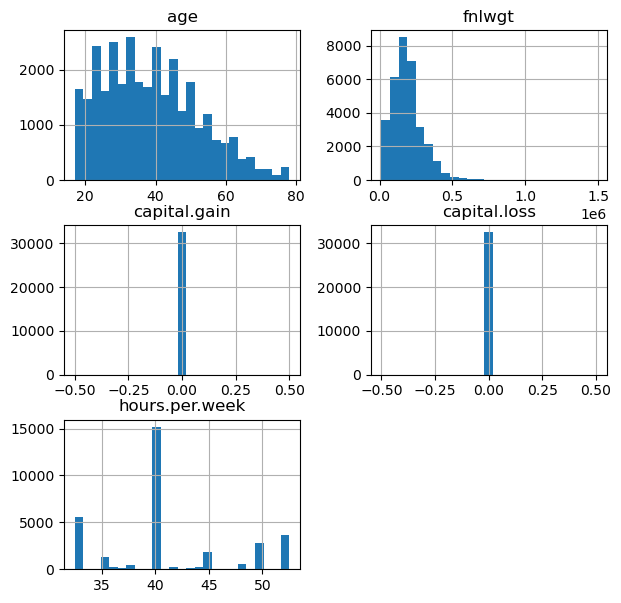

In [34]:
# Histograms are a useful tool for visualizing the distribution of numerical data in a dataset.
#They represent the frequency distribution of values within a specific numerical column.
data[numerical_features].hist(bins=25, figsize=(7, 7))
plt.show()

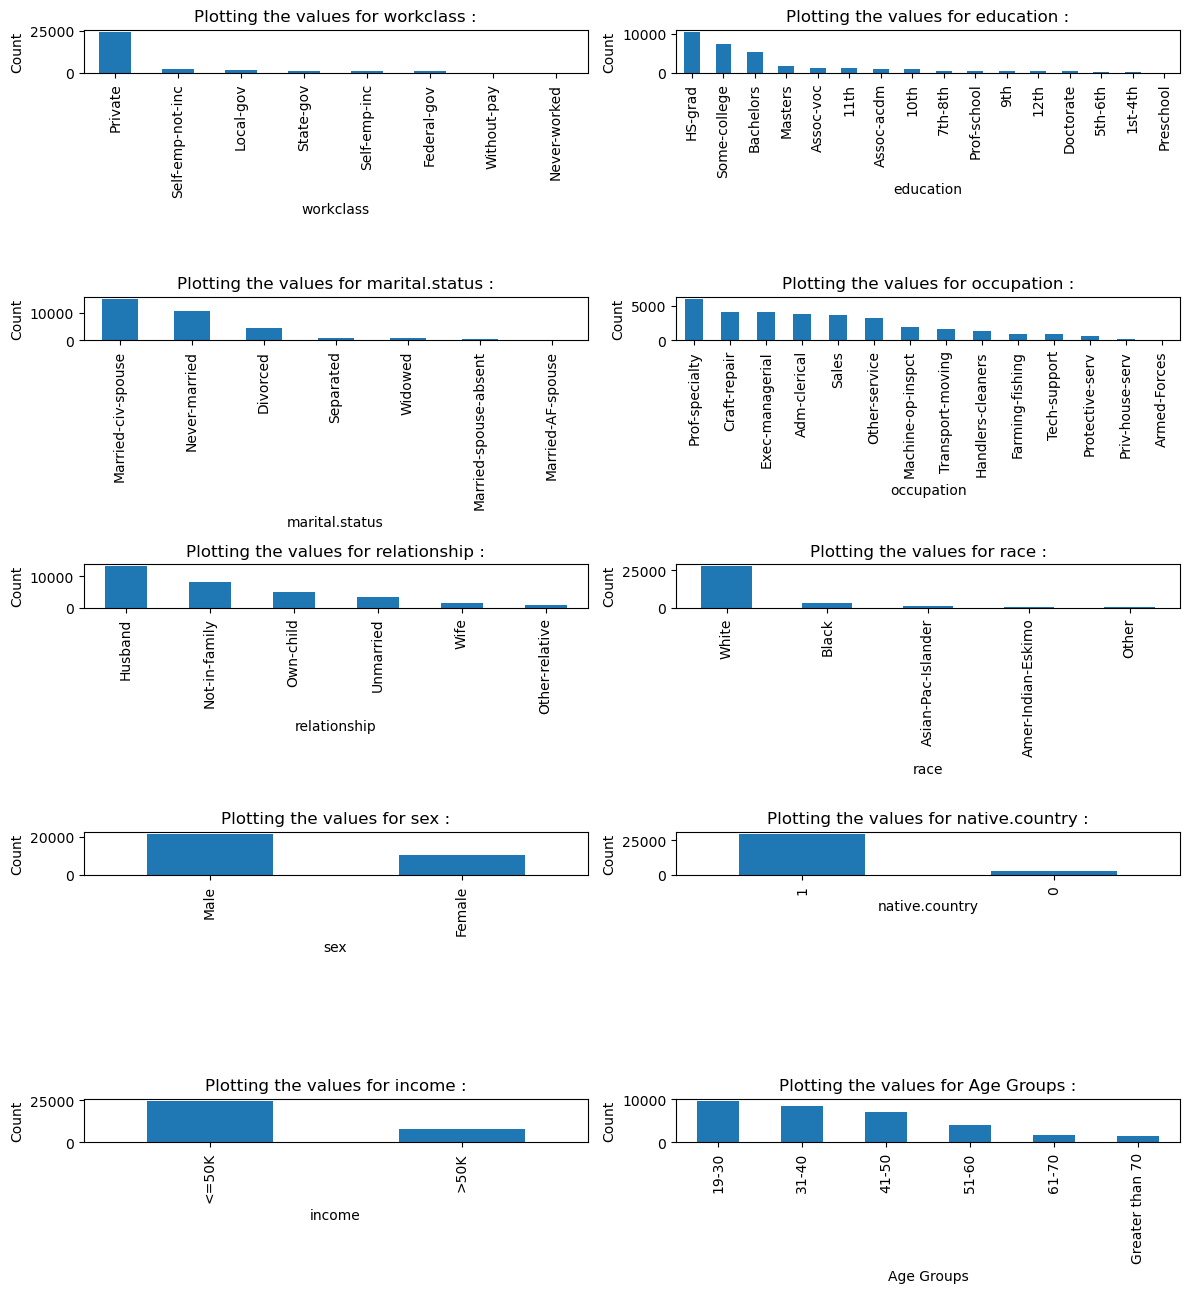

In [35]:
#The number of rows for the subplot grid is determined by the number of categorical features.
num_rows = len(categorical_features)

#The number of columns for the subplot grid is not specified in the given statement.
num_cols = 2

#A figure is created with a specified size using the statement mentioned.
fig = plt.figure(figsize=(12, 25))


for i, col in enumerate(categorical_features):
    #The adds a subplot to the figure for the current categorical feature.
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    #Creation of the plot.
    data[col].value_counts().plot(kind='bar', ax=ax)
    
    #Defining the title of the plot.
    ax.set_title(f'Plotting the values for {col} :')
    
    #Defining the X Label of the plot.
    ax.set_xlabel(col)
    
    #Defining the Y Label of the plot.
    ax.set_ylabel('Count')

#Showing the plot.
plt.tight_layout()
plt.show()

C:\Users\vaish\AppData\Local\Temp\ipykernel_39332\1921979888.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[numerical_features[i]],shade=True, color='b')
C:\Users\vaish\AppData\Local\Temp\ipykernel_39332\1921979888.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[numerical_features[i]],shade=True, color='b')
C:\Users\vaish\AppData\Local\Temp\ipykernel_39332\1921979888.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\vaish\AppData\Local\Temp\ipykernel_39332\1921979888.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[numerical_features[i]],shade=Tru

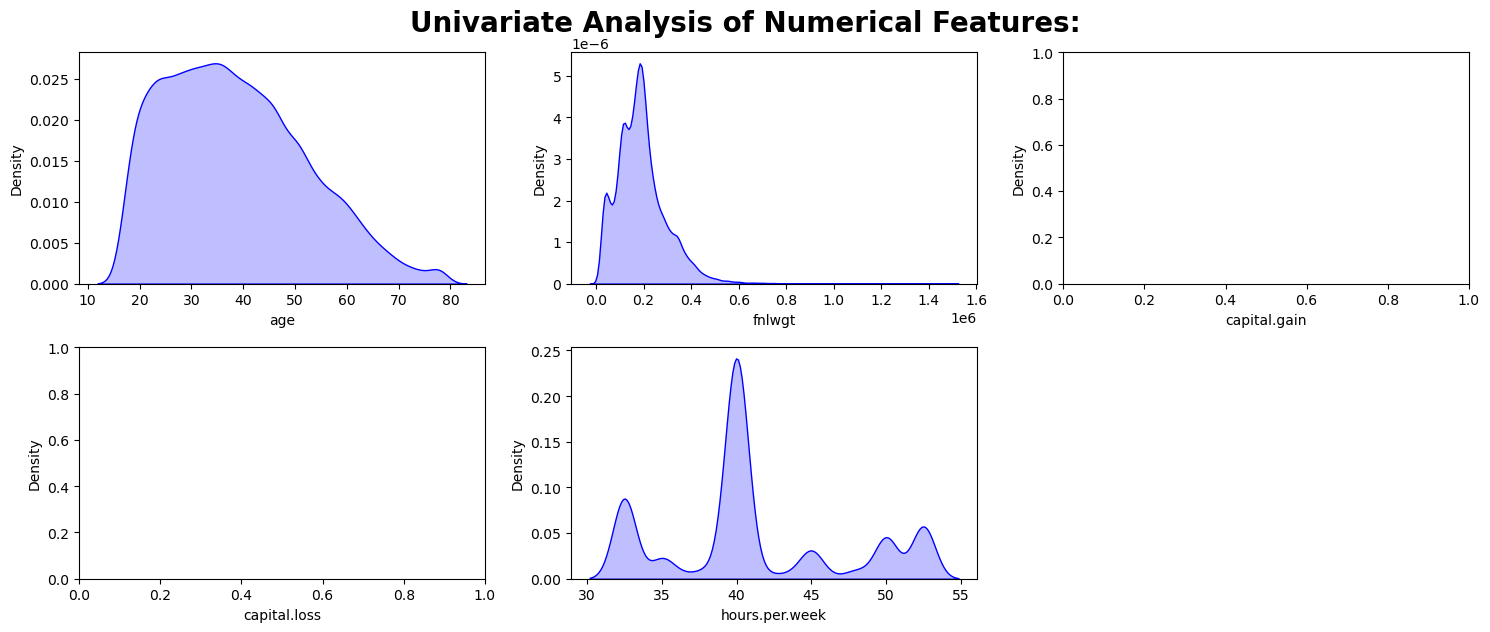

In [36]:
#Defining the size of the figure.
plt.figure(figsize=(15, 15))

#Defining the title of the plot.
plt.suptitle('Univariate Analysis of Numerical Features:', fontsize=20, fontweight='bold')

#Iterating the loop over all the features.
for i in range(0, len(numerical_features)):
    
    #The code creates a grid of subplots with 5 rows and 3 columns, and the position of the current subplot is specified by i+1.
    plt.subplot(5, 3, i+1)
    
    #ses Seaborn to generate a Kernel Density Estimate plot for the current numerical feature.
    sns.kdeplot(x=data[numerical_features[i]],shade=True, color='b')
    
    #Defining the X Labels of the plot.
    plt.xlabel(numerical_features[i])
    
    #Visualising the plot.
    plt.tight_layout()

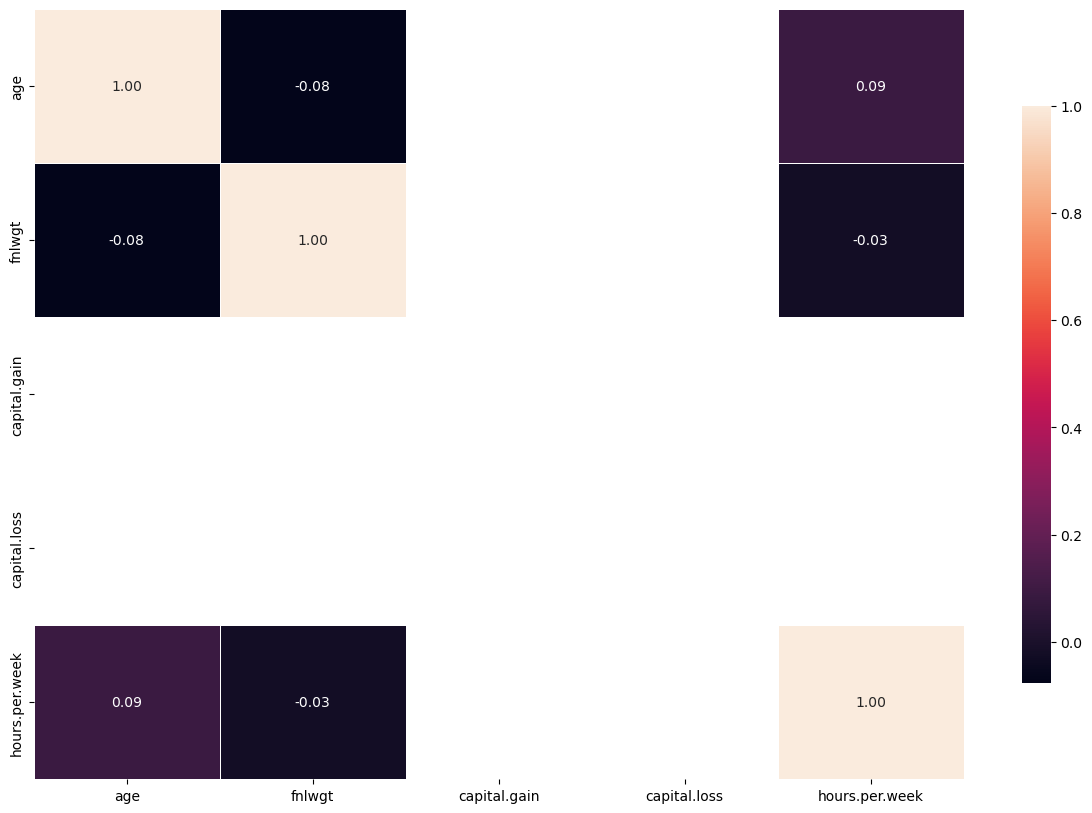

In [37]:
#Checking Multicollinearity in Numerical features:

#Defining the size of the figure.
plt.figure(figsize=(15, 10))

#Defining the heatmap with the required attributes.
sns.heatmap(data[numerical_features].corr(), annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": 0.75})

#Displaying the plot.
plt.show()

#From the correlation matrix below we can conclude that there is no multicollineraity feature.

In [40]:
#Converting String Values into numeric Variables using Label Encoding Techniques.

le = LabelEncoder()
data['workclass'] = le.fit_transform(data['workclass'])
data['marital.status'] = le.fit_transform(data['marital.status'])
data['occupation'] = le.fit_transform(data['occupation'])
data['relationship'] = le.fit_transform(data['relationship'])
data['race'] = le.fit_transform(data['race'])
data['sex'] = le.fit_transform(data['sex'])
data['native.country'] = le.fit_transform(data['native.country'])
data['income'] = le.fit_transform(data['income'])
data['education'] = le.fit_transform(data['education'])
data['Age Groups'] = le.fit_transform(data['Age Groups'])

data

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Groups
0,78,3,77053,11,6,9,1,4,0,0,0,40.0,1,0,5
1,78,3,132870,11,6,3,1,4,0,0,0,32.5,1,0,5
2,66,3,186061,15,6,9,4,2,0,0,0,40.0,1,0,4
3,54,3,140359,5,0,6,4,4,0,0,0,40.0,1,0,3
4,41,3,264663,15,5,9,3,4,0,0,0,40.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,15,4,10,1,4,1,0,0,40.0,1,0,0
32557,27,3,257302,7,2,12,5,4,0,0,0,38.0,1,0,0
32558,40,3,154374,11,2,6,0,4,1,0,0,40.0,1,1,1
32559,58,3,151910,11,6,0,4,4,0,0,0,40.0,1,0,3


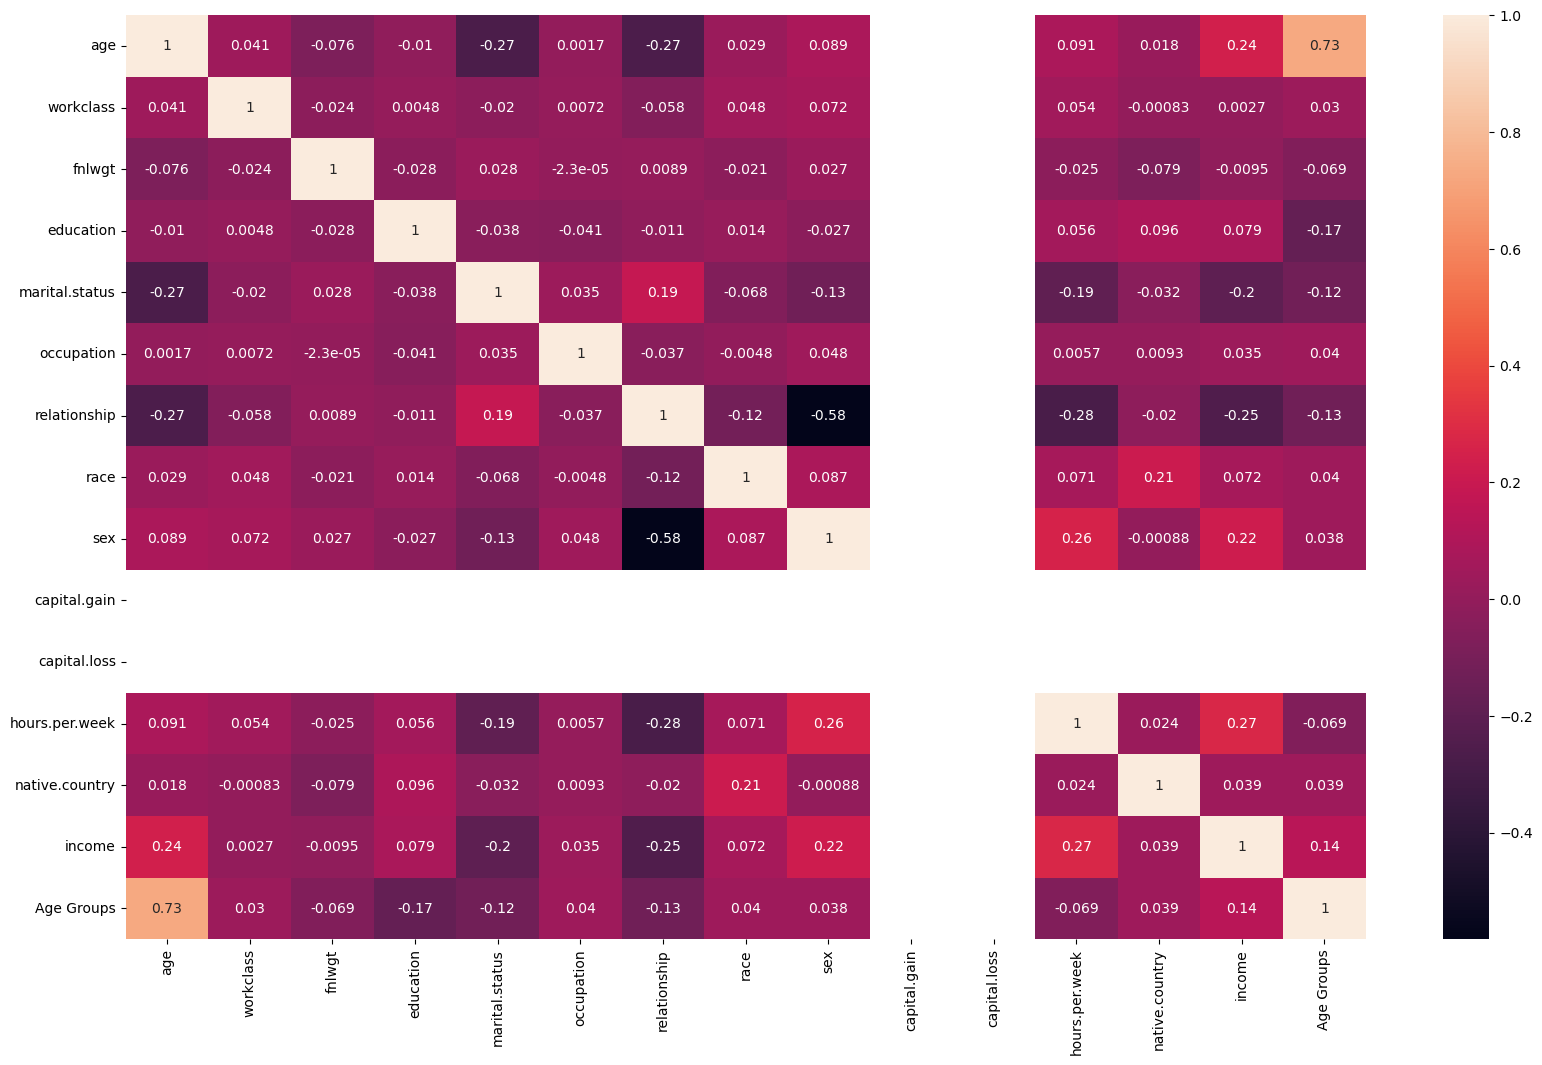

In [41]:
# Check colinearity among data columns
corr = data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

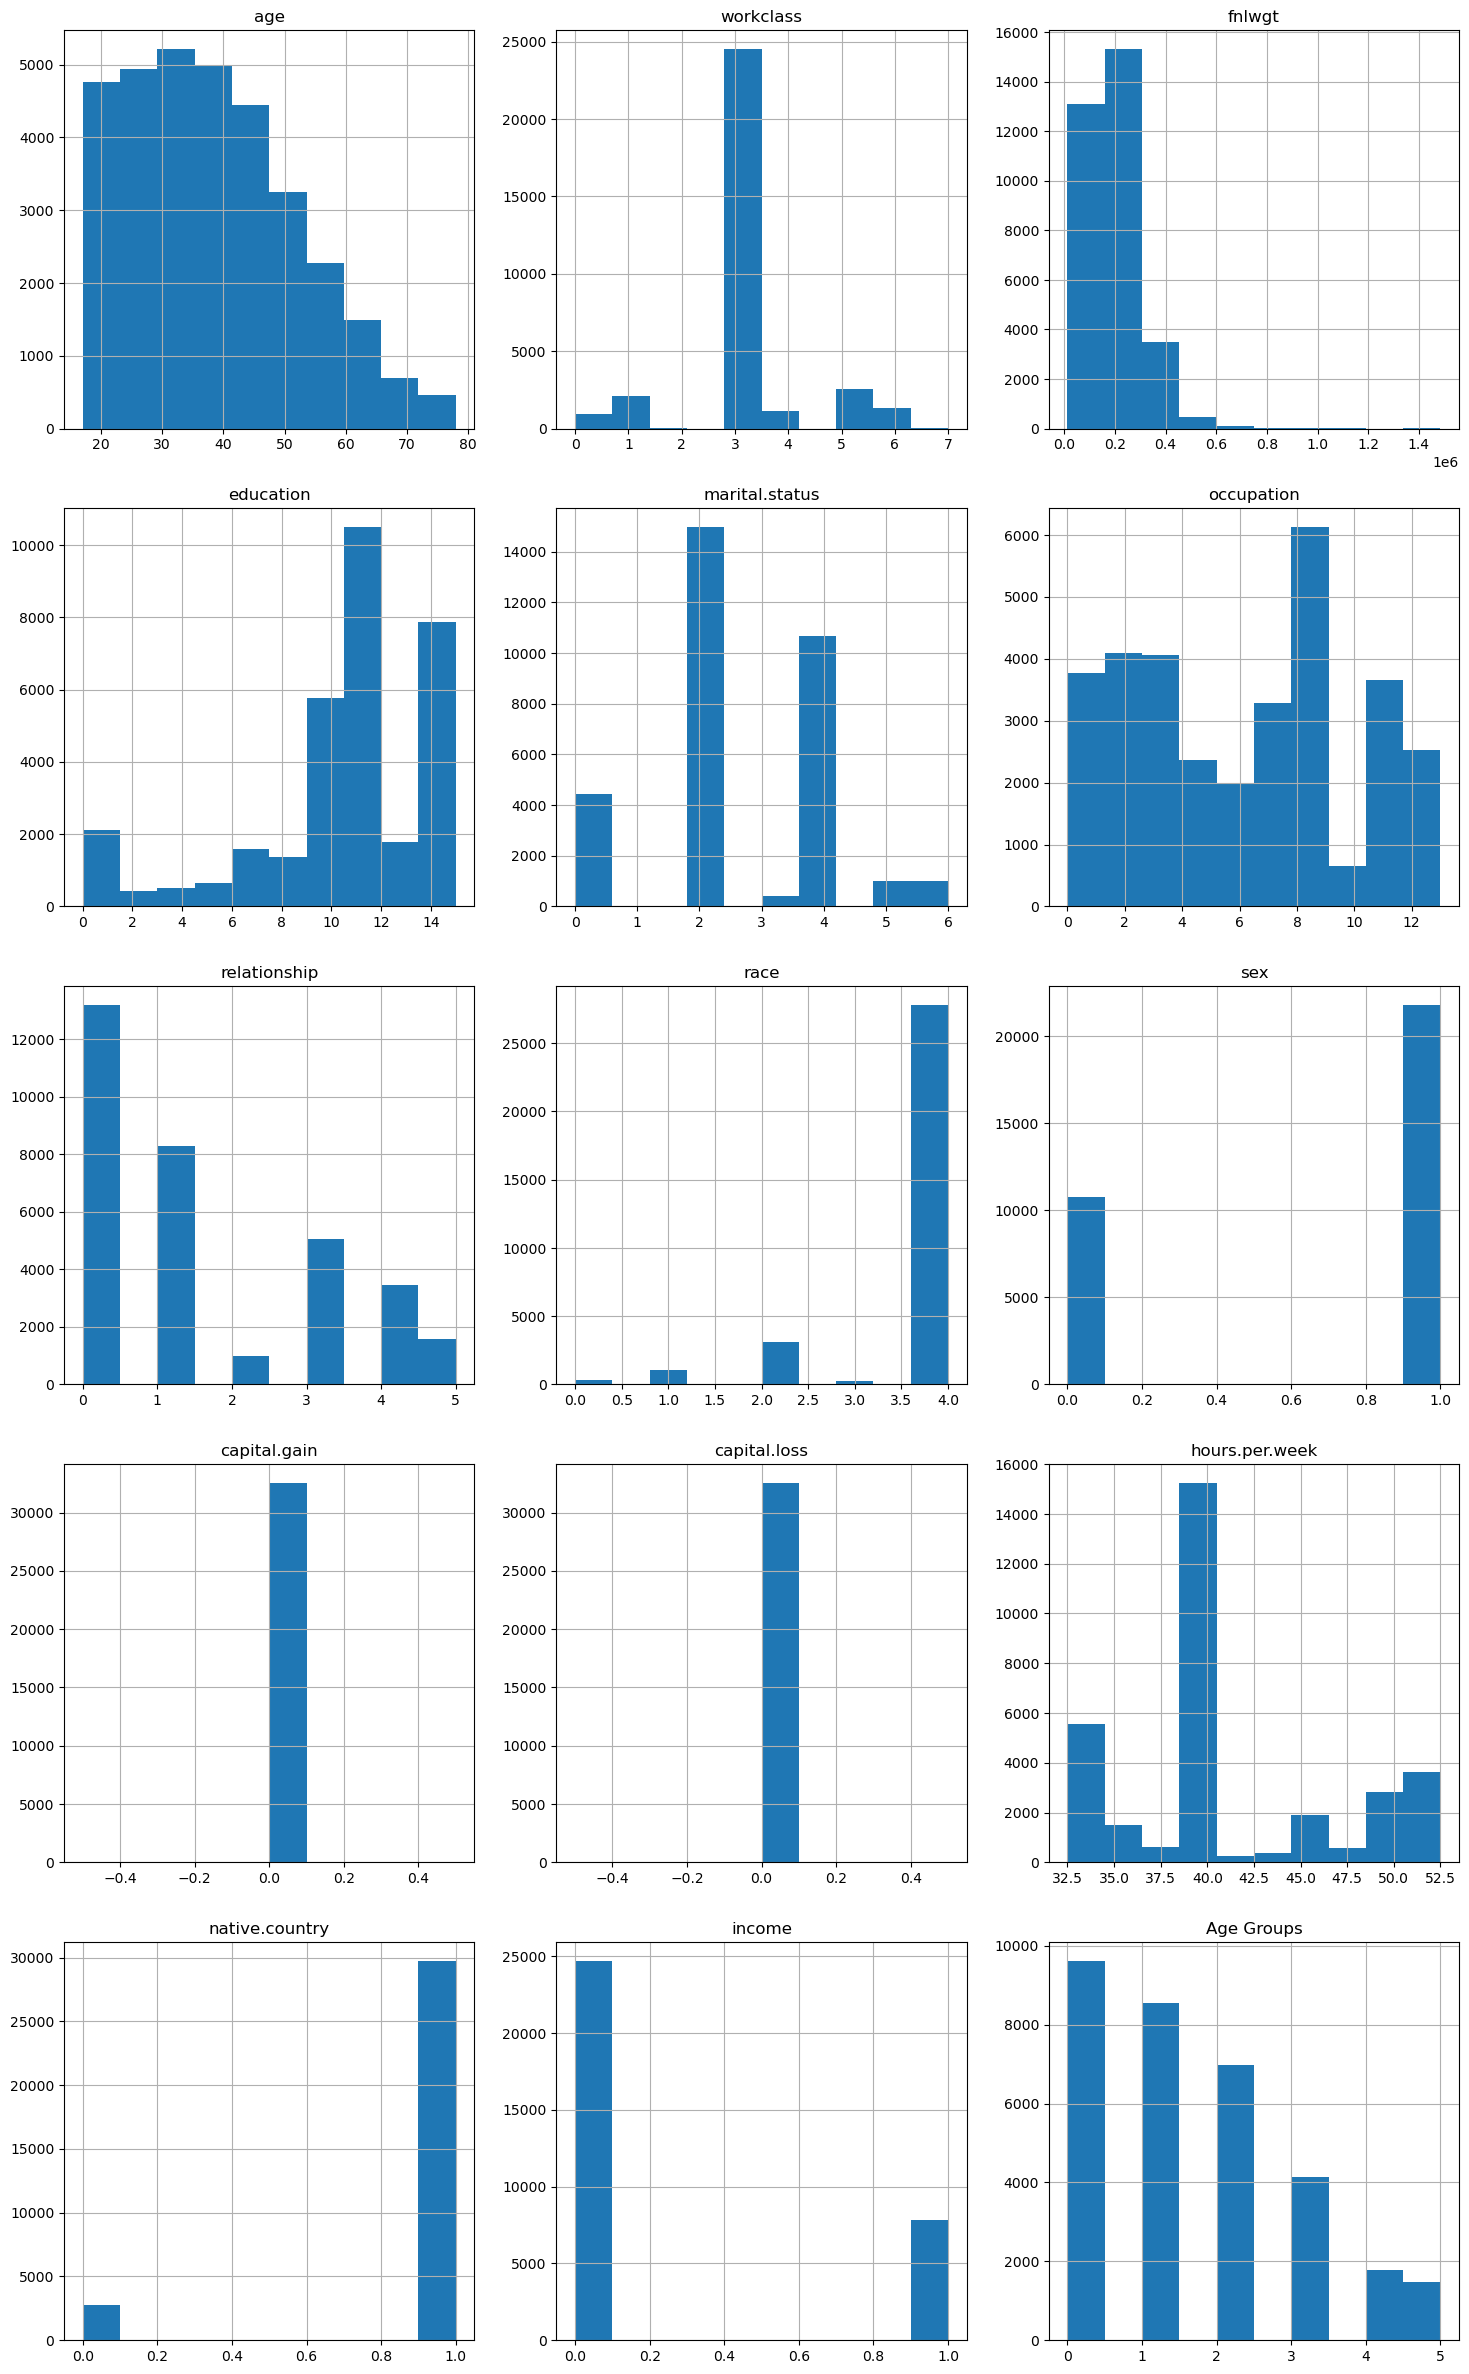

In [42]:
#Calculating the number of rows and number of columns.
num_cols = len(data.columns)
num_rows = int(np.ceil(num_cols / 3))

#Creating a number of subplots as per the length of number of rows and columns.
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows), sharex=False)

#Flatting the axes.
axes = axes.flatten()

#For Each columns that are present creating a subplots.
for i, col in enumerate(data.columns):
    data[col].hist(ax=axes[i])
    axes[i].set_title(col)

# Removing any blank subplots that are present.
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])
    
#Displaying all the plots.
plt.show()

In [ ]:
Output:

This code provides a quick visualization of the distribution of each numerical feature in the DataFrame using histograms.
Each histogram gives an overview of the spread and central tendency of the corresponding column's values.

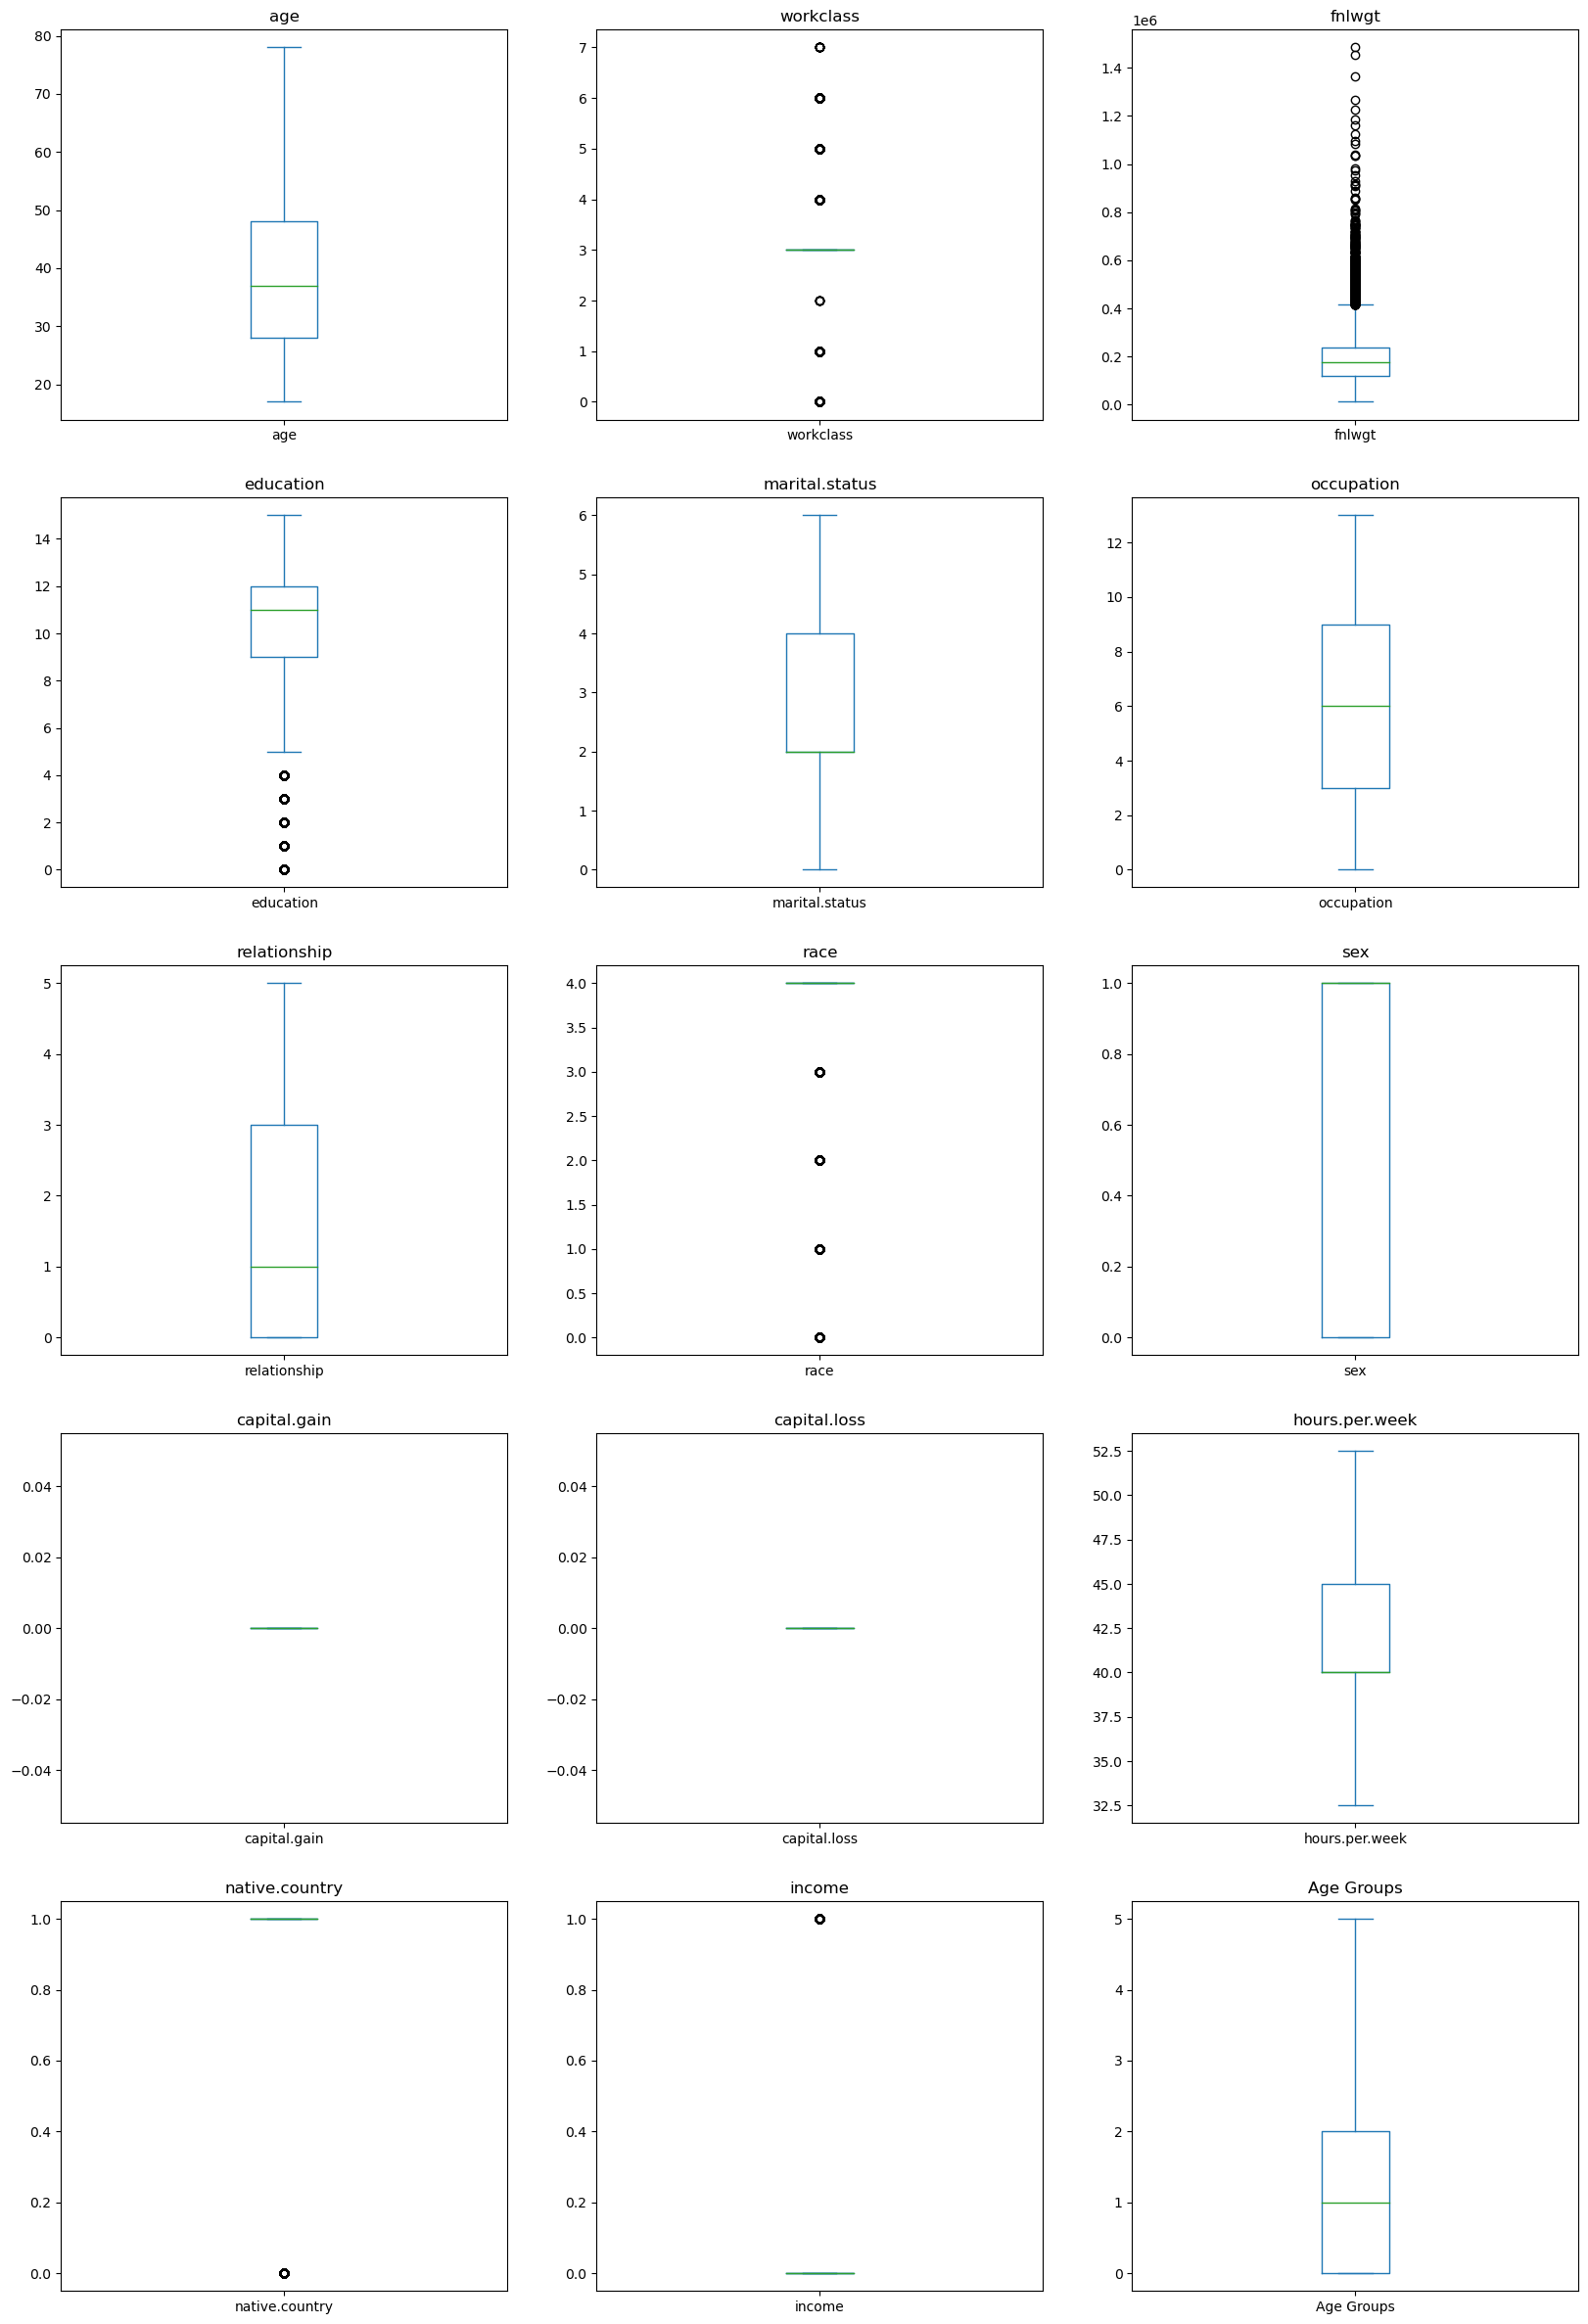

In [43]:
#Creating a number of subplots as per the length of number of rows and columns.
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 6 * num_rows), sharex=False)

#Flattening the axes. 
axes = axes.flatten()

#Creating the box plot for each of the boxes. 
for i, col in enumerate(data.columns):
    data[col].plot(kind='box', ax=axes[i])
    axes[i].set_title(col)

#Removing any empty box plots that are present.
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

#Displaying the plot.
plt.show()

In [44]:
#Normalization (Scaling of values - MinMaxScalar)
# The process of normalization, often called scaling, is a data preprocessing procedure that puts feature values into a range. 
# One popular normalization technique is min-max scaling, which is carried out with the help of MinMaxScaler.
# In order to avoid one feature from dominating because of its higher size, all features should be brought to a similar scale.

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Convert the NumPy array back to a DataFrame with original column names and index
normalized_data = pd.DataFrame(normalized_data, columns=data.columns, index=data.index)

# Now 'normalized_data' should be normalized between 0 and 1
normalized_data.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Groups
0,1.000000,0.428571,0.043987,0.733333,1.000000,0.692308,0.2,1.0,0.0,0.0,0.0,0.375,1.0,0.0,1.0
1,1.000000,0.428571,0.081896,0.733333,1.000000,0.230769,0.2,1.0,0.0,0.0,0.0,0.000,1.0,0.0,1.0
2,0.803279,0.428571,0.118021,1.000000,1.000000,0.692308,0.8,0.5,0.0,0.0,0.0,0.375,1.0,0.0,0.8
3,0.606557,0.428571,0.086982,0.333333,0.000000,0.461538,0.8,1.0,0.0,0.0,0.0,0.375,1.0,0.0,0.6
4,0.393443,0.428571,0.171404,1.000000,0.833333,0.692308,0.6,1.0,0.0,0.0,0.0,0.375,1.0,0.0,0.4


[![Alt text](https://1.bp.blogspot.com/-KLh-cgwhUDU/YOxCgi-tHGI/AAAAAAAACgQ/_jxfmNWi9cgHAdk9UG-2jZo5CQlc_bwIwCLcBGAsYHQ/w1200-h630-p-k-no-nu/08.png)](https://1.bp.blogspot.com/-KLh-cgwhUDU/YOxCgi-tHGI/AAAAAAAACgQ/_jxfmNWi9cgHAdk9UG-2jZo5CQlc_bwIwCLcBGAsYHQ/w1200-h630-p-k-no-nu/08.png)



In [45]:
# After normalization,all integer columns,count, mean, standard deviation, minimum, 25,50,75 percentile, and
# maximum are displayed.
scalar_des = data.describe()
scalar_des

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Age Groups
count,32537.000000,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.0,32537.0,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.559855,3.094446,1.897808e+05,10.297507,2.611427,6.139288,1.446538,3.665827,0.669238,0.0,0.0,41.203246,0.913883,0.240926,1.520392
std,13.554847,1.107549,1.055565e+05,3.870142,1.506301,3.973173,1.607064,0.848847,0.470495,0.0,0.0,6.187352,0.280542,0.427652,1.404298
min,17.000000,0.000000,1.228500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,32.500000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.0,0.0,40.000000,1.000000,0.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.0,0.0,40.000000,1.000000,0.000000,1.000000
75%,48.000000,3.000000,2.369930e+05,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.0,0.0,45.000000,1.000000,0.000000,2.000000
max,78.000000,7.000000,1.484705e+06,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,0.0,0.0,52.500000,1.000000,1.000000,5.000000


In [46]:
#Categorising the data into train and test data:

#Including all the attributes except income that is the independent variables.
X = data.drop('income', axis=1)

# Including the dependent variable.
Y = data['income']

#Splitting the data into train and test that is 80% of data is training data and remaining 20% is testing data.
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X, Y ,test_size = 0.2, random_state=42)

In [47]:
#Displaying the training and testing values.

print("\nX Training Data is\n", len(X_Train), "\n", X_Train)
print("\nX Testing Data is\n", len(X_Test), "\n", X_Test)
print("\nY Training Data is\n", len(Y_Train), "\n", Y_Train)
print("\nY Testing Data is\n", len(Y_Test), "\n", Y_Test)


X Training Data is
 26029 
        age  workclass  fnlwgt  education  marital.status  occupation  \
32239   41          4   64506         11               2           4   
30377   29          3  211482          9               2          11   
5455    43          4  196945         11               2           7   
19698   46          3  282538          8               5           6   
23193   30          3  100734         15               2           0   
...    ...        ...     ...        ...             ...         ...   
29823   31          3  112627         11               2          13   
5390    51          3  146767          8               2           9   
860     55          0  238192         11               2          12   
15800   23          3  233626          9               4          11   
23667   47          5  171968          9               6           3   

       relationship  race  sex  capital.gain  capital.loss  hours.per.week  \
32239             0     4   

In [48]:
#Scaling the data using Standard Scaler.

# The StandardScaler is a method used to standardize features in a dataset.
# It does so by removing the mean and scaling the data to unit variance.
scaler = StandardScaler()

#The code is fitting the StandardScaler to the training data (X_Test) and transforming the data using the fit_transform method 
#This calculates the mean and standard deviation of each feature in the training set, and then subtracts the mean and dividesby
#the standard deviation to transform the data.
X_Train = scaler.fit_transform(X_Train)

In [49]:
#The code is fitting the StandardScaler to the training data (X_Test) and transforming the data using the fit_transform method 
#This calculates the mean and standard deviation of each feature in the training set, and then subtracts the mean and dividesby
#the standard deviation to transform the data.
X_Test = scaler.fit_transform(X_Test)

In [50]:
#Implementing Machine Learning Models:
# 1.Logistic Regression:A statistical technique and classification algorithm used in machine learning is called 
# logistic regression. In spite of its name, its main application is in binary classification issues, where the result 
# variable has two classes and is categorical in nature.

[![Logistic Regression](https://forum.huawei.com/enterprise/api/file/v1/small/thread/667245476950446080.png?appid=esc_en)](https://forum.huawei.com/enterprise/api/file/v1/small/thread/667245476950446080.png?appid=esc_en)


In [51]:
# List to store models, names, and accuracies
models_list = []

In [52]:
#Creating a method of the model.
log_model = LogisticRegression()

#Training the model using fit function.
log_model.fit(X_Train,Y_Train)

LogisticRegression()

In [53]:
#Calculating Model Score.
log_model_score=log_model.score(X_Train,Y_Train)
print(log_model_score)

0.7701025778938876


In [54]:
#Testing the model using predict function.
log_pred = log_model.predict(X_Test)

#Calculating the accuracy of predicted values and actuall values.
log_model_acc=accuracy_score(Y_Test,log_pred)

print(log_model_acc)

0.7747387830362631


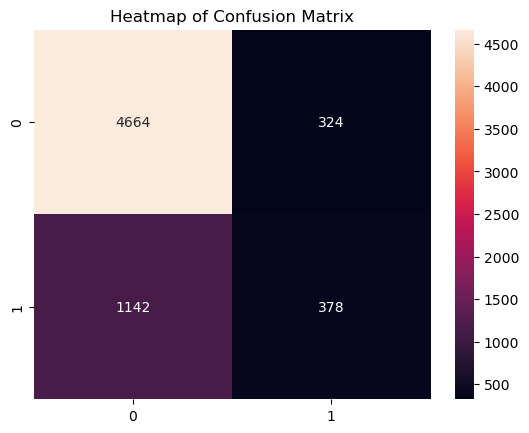

In [55]:
#Creating a confusion matrix for model evaulation.
cm = confusion_matrix(Y_Test,log_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [56]:
#Hyperparameter Training.
params = dict(penalty=['l1','l2','elasticnet'],C=[1,0.1,0.01,10,100])

#Using Random Search CV training the model again with the hyper parameters.
best_log_model = RandomizedSearchCV(log_model,params,random_state=7)

#Testing the model using predict function.
best_log_model.fit(X_Train,Y_Train)

C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1, 0.1, 0.01, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=7)

In [57]:
#Finding the best parameters.
best_log_model.best_params_

{'penalty': 'l2', 'C': 0.01}

In [58]:
#Defining the model with best parameters.
best_model_log = LogisticRegression(penalty='l2',C = 10)

In [59]:
#Training the model with best parameters.
best_model_log.fit(X_Train,Y_Train)

LogisticRegression(C=10)

In [60]:
#Testing the model using predict function.
best_log_pred = best_model_log.predict(X_Test)

#Calculating the accuracy of predicted values and actuall values.
best_model_acc=accuracy_score(Y_Test,best_log_pred)
print(best_model_acc)

0.7745851259987707


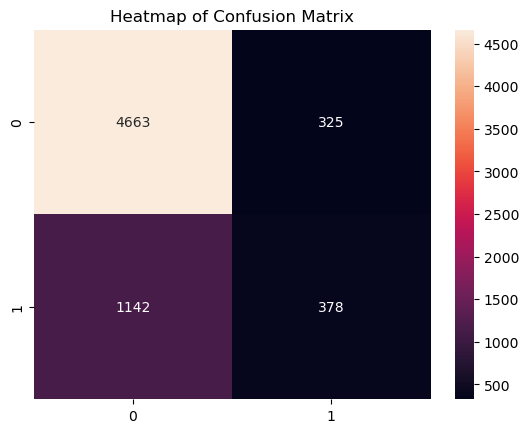

In [61]:
#Creating a confusion matrix for model evaulation.
cm = confusion_matrix(Y_Test,best_log_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [62]:
# Store model information in a dictionary
model_info = {'model':log_model , 'accuracy':best_model_acc}

# Add the dictionary to the list
models_list.append(model_info)

In [63]:
models_list

[{'model': LogisticRegression(), 'accuracy': 0.7745851259987707}]

[![Alt text](https://miro.medium.com/max/1104/1*Pdh5gZWpAq1oVssi2N0w2w.png)](https://miro.medium.com/max/1104/1*Pdh5gZWpAq1oVssi2N0w2w.png)


In [64]:
#Creating a method of the model.
rf_model = RandomForestClassifier()

#Training the model using fit function.
rf_model.fit(X_Train,Y_Train)

RandomForestClassifier()

In [65]:
#Calculating Model Score.
rf_model_score=rf_model.score(X_Train,Y_Train)
print(rf_model_score)

0.9998463252526029


In [66]:
#Testing the model using predict function.
rf_pred = rf_model.predict(X_Test)

#Calculating the accuracy of predicted values and actuall values.
rf_model_acc=accuracy_score(Y_Test,rf_pred)

print(rf_model_acc)

0.8225261216963737


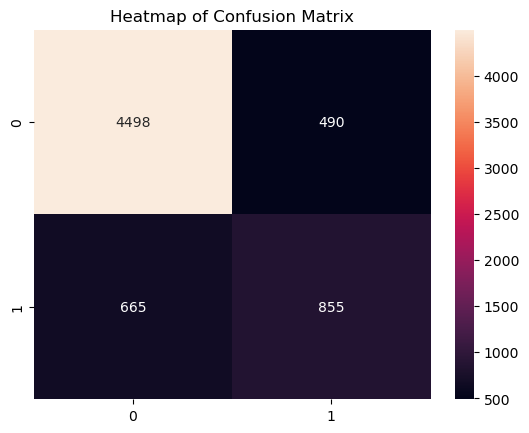

In [67]:
#Creating a confusion matrix for model evaulation.
cm = confusion_matrix(Y_Test,rf_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [68]:
#Hyperparameter Training.
params = dict(criterion=['gini', 'entropy'],max_depth=[1,10,5],min_samples_split=[1,10])

#Using Random Search CV training the model again with the hyper parameters.
best_rf_model = RandomizedSearchCV(rf_model,params,random_state=7)

#Testing the model using predict function.
best_rf_model.fit(X_Train,Y_Train)

C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vaish\anaconda3\Lib\site-packages\

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 10, 5],
                                        'min_samples_split': [1, 10]},
                   random_state=7)

In [69]:
#Finding the best parameters in the model.
best_rf_model.best_params_

{'min_samples_split': 10, 'max_depth': 10, 'criterion': 'gini'}

In [70]:
#Defining the model with best parameters.
best_model_rf = RandomForestClassifier(min_samples_split= 5, max_depth= 10, criterion= 'entropy')

In [71]:
#Training the model with best hyper parameters.
best_model_rf.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

In [72]:
#Testing the model using predict function.
best_rf_pred = best_model_rf.predict(X_Test)

#Calculating the accuracy of predicted values and actuall values.
rf_best_model_acc=accuracy_score(Y_Test,best_rf_pred)
print(rf_best_model_acc)

0.8326674861708666


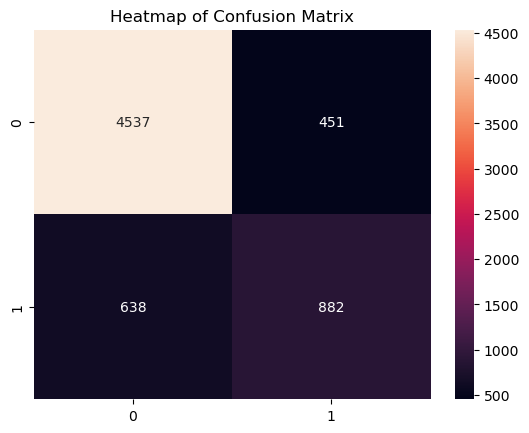

In [73]:
#Creating a confusion matrix for model evaulation.
cm = confusion_matrix(Y_Test,best_rf_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [74]:
# Store model information in a dictionary
model_info = {'model':rf_model , 'accuracy':rf_best_model_acc}

# Add the dictionary to the list
models_list.append(model_info)

In [75]:
models_list

[{'model': LogisticRegression(), 'accuracy': 0.7745851259987707},
 {'model': RandomForestClassifier(), 'accuracy': 0.8326674861708666}]

[![Alt text](https://i.ytimg.com/vi/A7FeQekjd9Q/maxresdefault.jpg)](https://i.ytimg.com/vi/A7FeQekjd9Q/maxresdefault.jpg)

In [76]:
#Creating a method of the model.
svm_model = SVC()

#Training the model using fit function.
svm_model.fit(X_Train,Y_Train)

SVC()

In [77]:
#Calculating Model Score.
svm_model_score=svm_model.score(X_Train,Y_Train)
print(svm_model_score)

0.8137077874678244


In [78]:
#Testing the model using predict function.
svm_pred = svm_model.predict(X_Test)

#Calculating the accuracy of predicted values and actuall values.
svm_model_acc=accuracy_score(Y_Test,svm_pred)

print(svm_model_acc)

0.8086969883220652


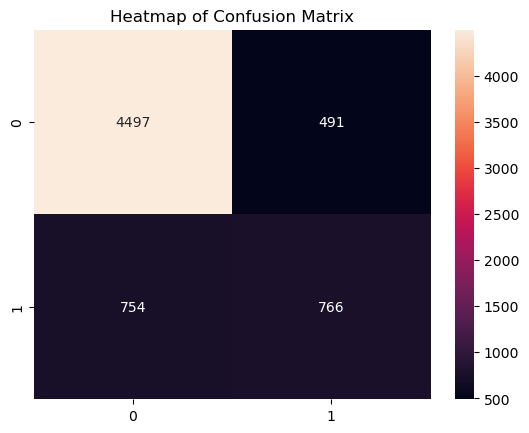

In [79]:
#Creating a confusion matrix for model evaulation.
cm = confusion_matrix(Y_Test,svm_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [80]:
#Hyperparameter Training.
params =dict(kernel=['linear', 'poly'],C=[1,0.1,0.01])

#Using Random Search CV training the model again with the hyper parameters.
Grid_model = GridSearchCV(svm_model,params,n_jobs=-1)

#Testing the model using predict function.
Grid_model.fit(X_Train,Y_Train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 0.1, 0.01], 'kernel': ['linear', 'poly']})

In [81]:
#Finding the best hyper parameters in the model.
Grid_model.best_params_

{'C': 1, 'kernel': 'poly'}

In [82]:
#Defining the model with best parameters and training it.
best_model_svm = SVC(kernel='poly',gamma='scale',C=1).fit(X_Train,Y_Train)

In [83]:
#Testing the model using predict function.
best_svm_pred = best_model_svm.predict(X_Test)

#Calculating the accuracy of predicted values and actuall values.
svm_best_model_acc=accuracy_score(Y_Test,best_svm_pred)
print(svm_best_model_acc)

0.784880147510756


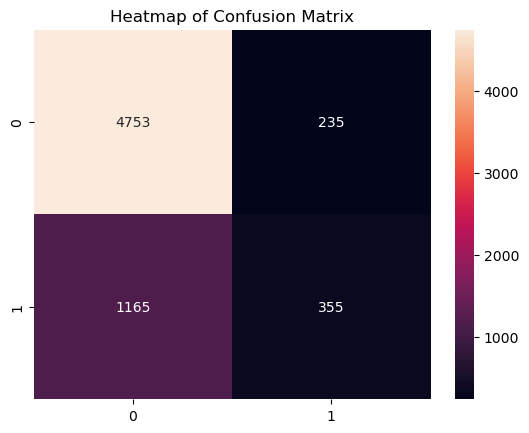

In [84]:
#Creating a confusion matrix for model evaulation.
cm = confusion_matrix(Y_Test,best_svm_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [85]:
# Store model information in a dictionary
model_info = {'model':svm_model , 'accuracy':svm_best_model_acc}

# Add the dictionary to the list
models_list.append(model_info)

In [86]:
#Out of the 3 models that were implemented Random Forest performs the best.
models_list

[{'model': LogisticRegression(), 'accuracy': 0.7745851259987707},
 {'model': RandomForestClassifier(), 'accuracy': 0.8326674861708666},
 {'model': SVC(), 'accuracy': 0.784880147510756}]

In [87]:
#Additional Examples:

In [88]:
#Reading the CSV File values in the URL directly into a pandas DataFrame.
columns = ['Age', 'Work Class', 'Final Weight', 'Education', 'Education Number', 'Marital Status', 'Occupation',
          'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per Week', 'Country', 'Income']
df = pd.read_csv('https://raw.githubusercontent.com/kb22/Income-Predictor/master/income-dataset.csv', names = columns)

In [89]:
#Checking for missing values.
df.isnull().sum()

Age                 0
Work Class          0
Final Weight        0
Education           0
Education Number    0
Marital Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours per Week      0
Country             0
Income              0
dtype: int64

In [90]:
# To find the number of non-null (non-missing) values in each column of a DataFrame,df.count() method is used.
# It gives back a Series with the counts for every column.
df.count()

Age                 32561
Work Class          32561
Final Weight        32561
Education           32561
Education Number    32561
Marital Status      32561
Occupation          32561
Relationship        32561
Race                32561
Sex                 32561
Capital Gain        32561
Capital Loss        32561
Hours per Week      32561
Country             32561
Income              32561
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work Class        32561 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital Loss      32561 non-null  int64 
 12  Hours per Week    32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [92]:
df['Age'] = pd.cut(df['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<Axes: xlabel='Age', ylabel='count'>

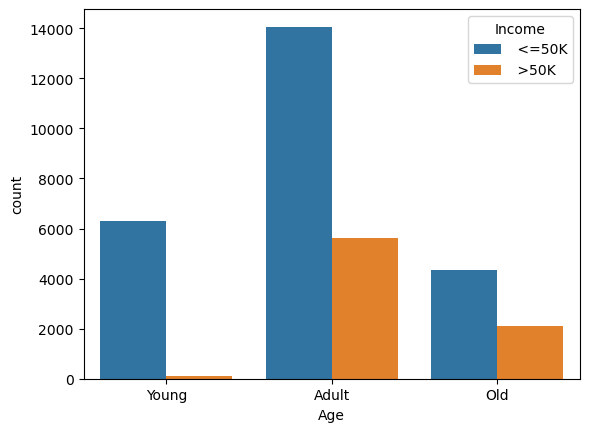

In [93]:
sns.countplot(x = 'Age', hue = 'Income', data = df)

In [94]:
#Encoding Data Values.
y = df['Income']
X = df.drop(['Income'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

Total features: 110


In [95]:
#Splitting the values into test and train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [96]:
#Creating a method of the model.
rf_model = RandomForestClassifier()

#Training the model using fit function.
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [97]:
#Calculating Model Score.
rf_model_score=rf_model.score(X_train,y_train)
print(rf_model_score)

0.9998244998244998


In [98]:
#Testing the model using predict function.
rf_pred = rf_model.predict(X_test)

#Calculating the accuracy of predicted values and actuall values.
rf_model_acc=accuracy_score(y_test,rf_pred)

print(rf_model_acc)

0.8420513870406388


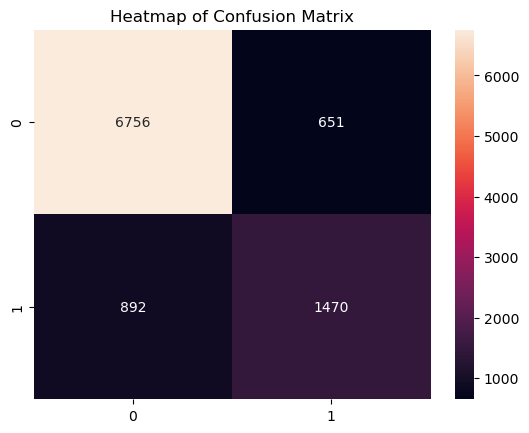

In [99]:
#Creating a confusion matrix for model evaulation.
cm = confusion_matrix(y_test,rf_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [100]:
#Hyperparameter Training.
params = dict(criterion=['gini', 'entropy'],max_depth=[1,10,5],min_samples_split=[1,10])

#Using Random Search CV training the model again with the hyper parameters.
best_rf_model = RandomizedSearchCV(rf_model,params,random_state=7)

#Testing the model using predict function.
best_rf_model.fit(X_train,y_train)

C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vaish\anaconda3\Lib\site-packages\

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 10, 5],
                                        'min_samples_split': [1, 10]},
                   random_state=7)

In [101]:
#Finding the best parameters in the model.
best_rf_model.best_params_

{'min_samples_split': 10, 'max_depth': 10, 'criterion': 'gini'}

In [102]:
#Defining the model with best parameters.
best_model_rf = RandomForestClassifier(min_samples_split= 5, max_depth= 10, criterion= 'entropy')

In [103]:
#Training the model with best hyper parameters.
best_model_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

In [104]:
#Testing the model using predict function.
best_rf_pred = best_model_rf.predict(X_test)

#Calculating the accuracy of predicted values and actuall values.
rf_best_model_acc=accuracy_score(y_test,best_rf_pred)
print(rf_best_model_acc)

0.8546422356433616


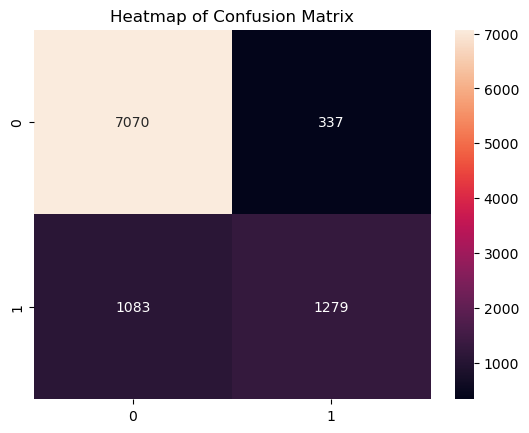

In [105]:
#Creating a confusion matrix for model evaulation.
cm = confusion_matrix(y_test,best_rf_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [107]:
# Summary Steps: